# Proyek Analisis Data: Air Quality Datase
- **Nama:** Axelliano Rafael Situmeang
- **Email:** axelliano95@gmail.com
- **ID Dicoding:** lyfora
- Dataset diperoleh dari https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view


## Pertanyaan Bisnis

1. Bagaimana perkembangan kualitas udara  di beberapa lokasi dari tahun ke tahun?
2. Apakah Polutan berpengaruh pada kenaikan suhu di lokasi tersebut?
3. Bagaimana pengaruh Polutan terhadap Ozon?

## Import Semua Packages/Library yang Digunakan

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Data Wrangling

### Gathering Data

In [110]:
os.getcwd()
os.chdir("..")
os.chdir("data")

# Data berada di /content/Data, pastikan dahulu file sudah dimasukkan ke folder tersebut sebelum eksekusi!

In [111]:
dataframes = []
for x in os.listdir():
  df = pd.read_csv(x)
  dataframes.append(df)
merged_df = pd.concat(dataframes,ignore_index=True)


In [112]:
merged_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assesing Data

#### Melihat Nullitas data serta typenya

In [113]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [114]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Dari hasil eksekusi code diatas diatas, didapati bahwa data CO menjadi data dengan null terbanyak yakni sebanyak 20701 data hilang berupa float.

#### Melihat adanya data duplikat

In [115]:
merged_df.duplicated().sum()

0

Data aman dari input duplikat. Masing-masing adalah unique

#### Melihat Persebaran (Describe) dari Data

In [116]:
merged_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Melihat ada tidaknya outlier menggunakan Boxplot

##### Data General

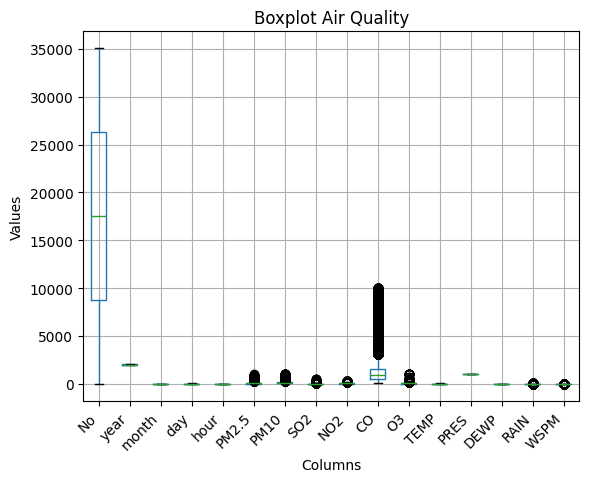

In [117]:
merged_df.boxplot()
plt.title('Boxplot Air Quality')
plt.xlabel('Columns')
plt.ylabel('Values')

# Rotate the x-axis labels for better readability, if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

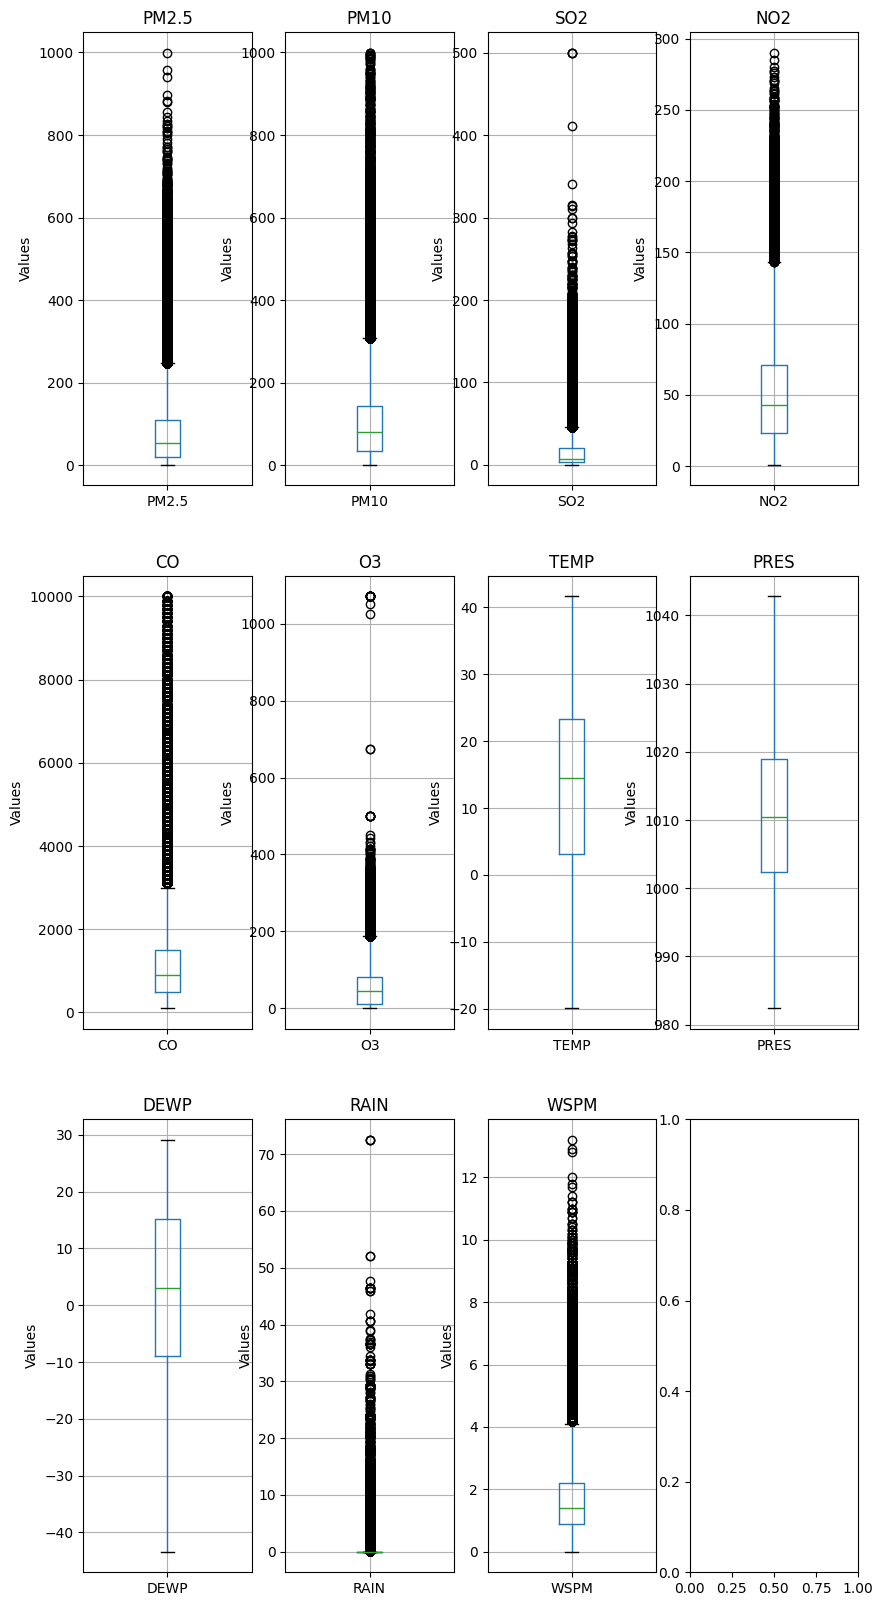

In [118]:
num_columns = len(merged_df.columns)
merged_df_int = merged_df.select_dtypes(exclude=['object']).iloc[:,5:]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 20))  # Adjust figsize to fit your screen

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(merged_df_int.columns):
    # Create boxplot for each column in its own subplot
    merged_df_int.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

# If the number of columns is odd, the last subplot will be empty, so let's remove it
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])
# Show the plot
plt.show()


Dari data diatas, Boxplotting secara general dan Boxplotting secara individual untuk masing-masing features, didapati bahwa Nilai PM2.5,PM10, SO2, NO2, CO, dan O3 masing-masing memiliki Outlier yang sangat banyak.

Adapun hal ini terjadi dikarenakan kemungkinan perbedaannya kefokusan daerah (Pegunungan vs Industrial) oleh sebab itu akan dicoba untuk boxplotting kembali di masing-masing Daerah

##### Boxplotting masing-masing Daerah

In [119]:
station = merged_df['station'].unique()
station

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

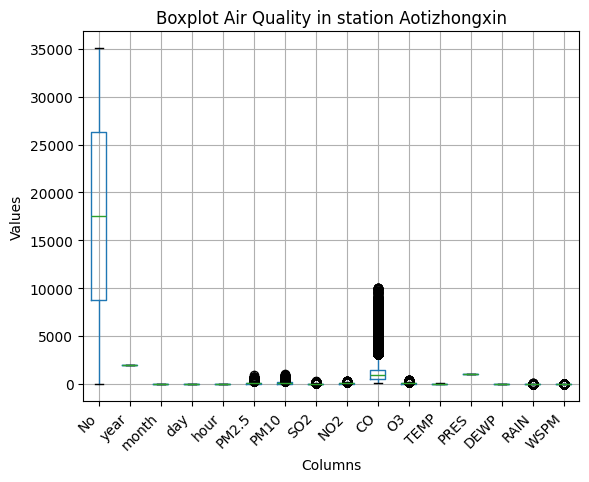

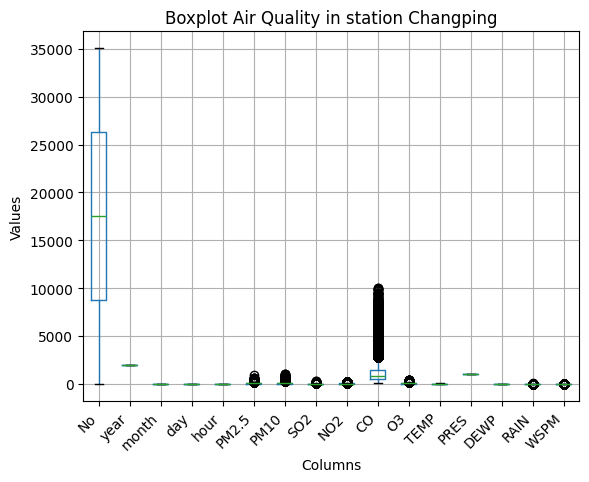

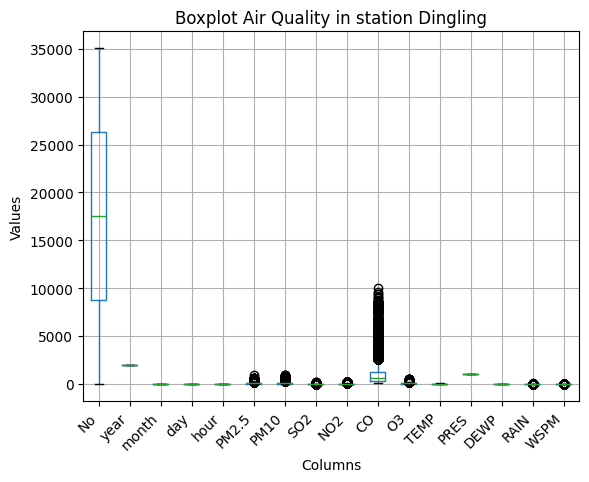

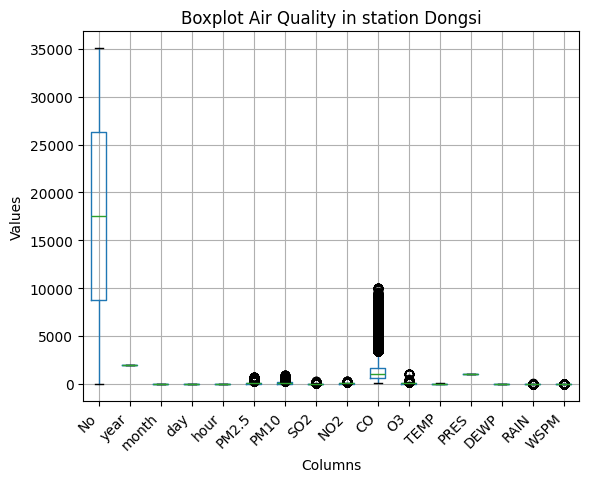

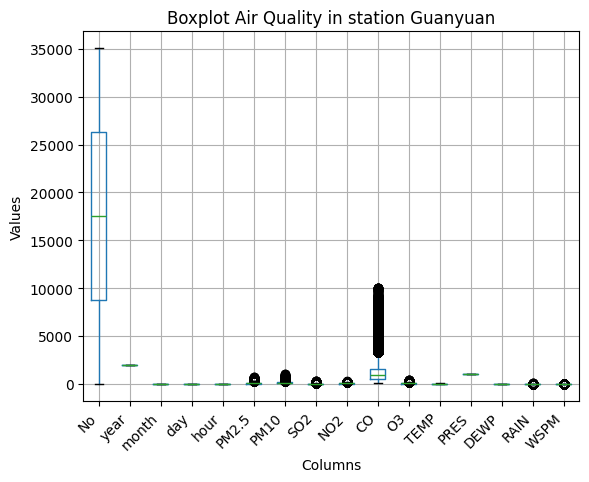

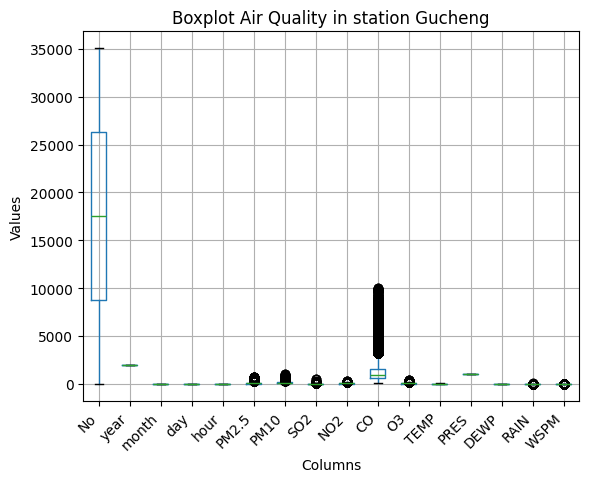

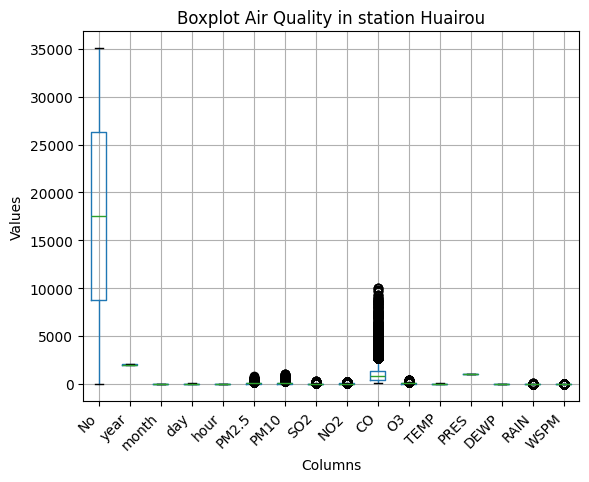

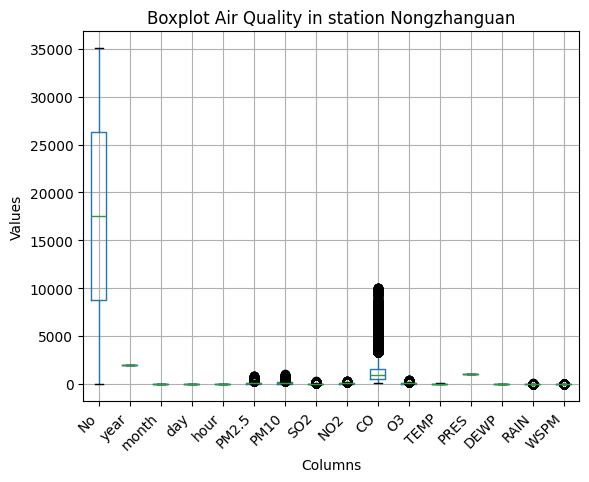

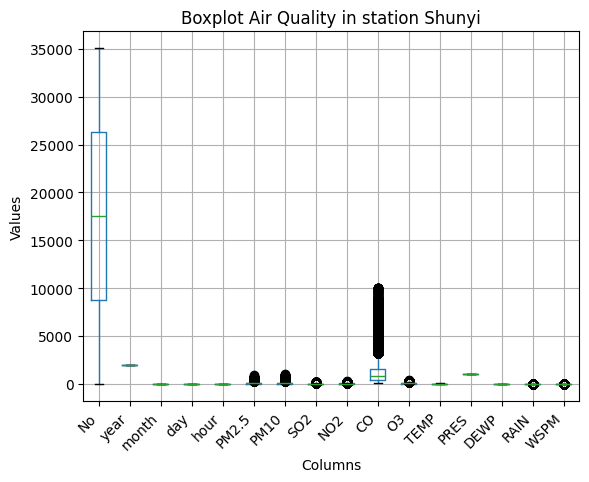

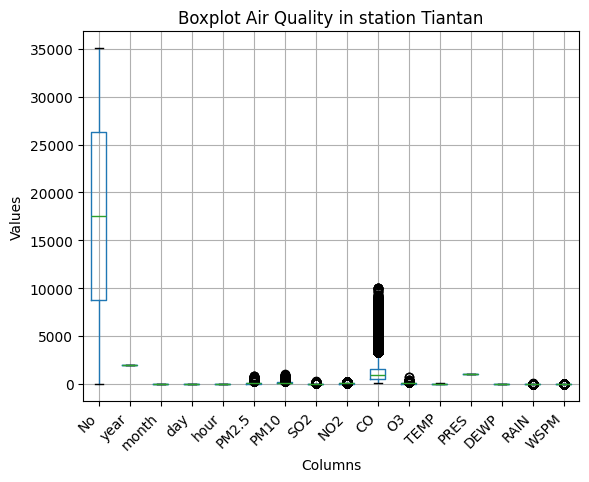

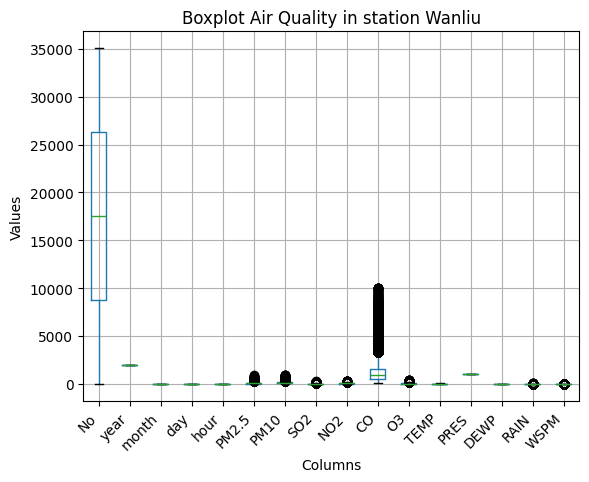

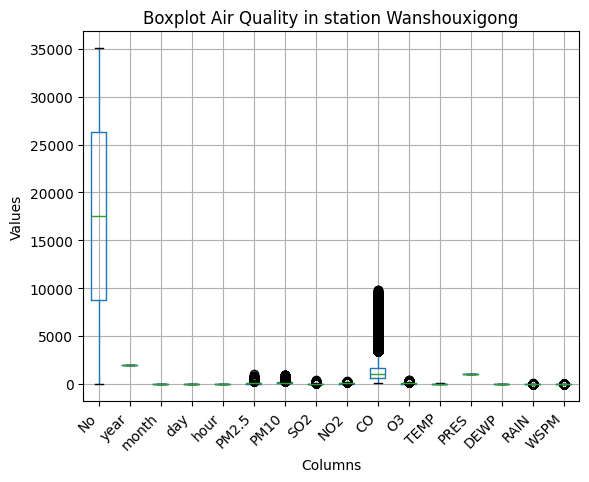

In [120]:
for x in station:
  test_data = merged_df[merged_df['station']==x]
  test_data.boxplot()
  plt.title('Boxplot Air Quality in station {}'.format(x))
  plt.xlabel('Columns')
  plt.ylabel('Values')
  plt.xticks(rotation=45, ha='right')
  plt.show()

Ternyata setelah dipecah menjadi sesuai lokasi, hasil outlier kurang lebih tetap sama seperti ketika hasil digabung (merged), sehingga dapat disimpulkan memang Air Quality di daerah tersebut semakin lama semakin buruk dan terjadi secara global

### Cleaning Data

Berkaca pada banyaknya data null (terutama CO2) yang didapatkan dari Assesing Data maka perlu dilakukan suatu cara mengatasi missing value ini.
Adapun saya memilih untuk menggunakan imputation dengan metode ffill (forward filling).
Asumsi saya adalah kualitas udara di keesokan harinya, biasanya tidak berbanding jauh dengan hari ini


Adapun untuk Outlier, tidak akan saya apa-apakan karena memang merepresentasikan kualitas udara yang semakin memburuk dari waktu ke waktu

#### Handling Missing Value

In [121]:
merged_df.fillna(method='ffill',inplace=True)

In [122]:
merged_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploraritory Data Analysis (EDA)

### Korelasi Antar Variabel

Disini saya akan mencoba melihat hubungan antar variabel dengan menggunakan skor korelasi antarvariabel.
Adapun untuk no, jam, tanggal tidak dimasukkan karena hanya sebagai timeseries

In [123]:
merged_df_int = merged_df.select_dtypes(exclude=['object']).iloc[:,5:]
merged_df_coor = merged_df_int.corr()


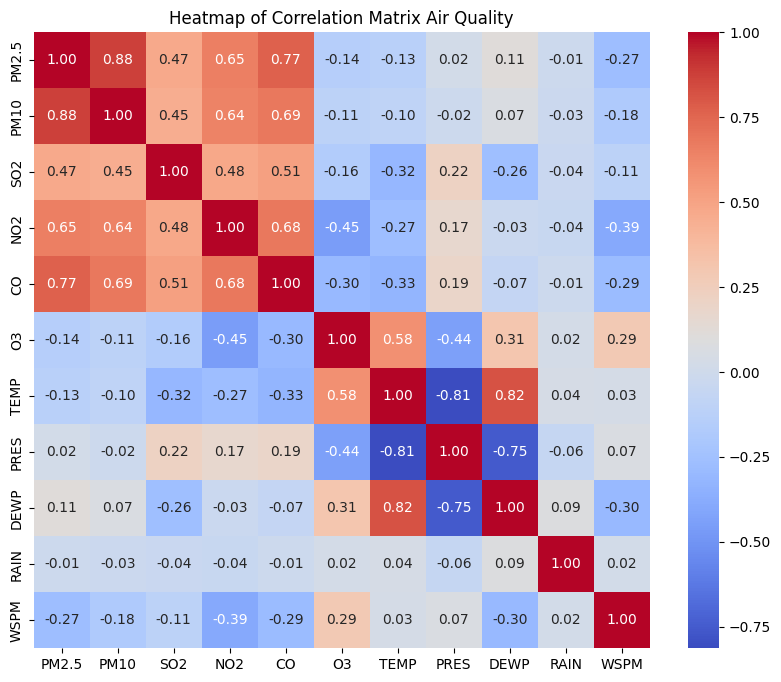

In [124]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_coor, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix Air Quality')
plt.show()

Didapati bahwa ada 2 grup yang cukup mencolok yakni :


1.   Group 1 - Kualitas Udara secara Kimia (PM2.5 PM.10 SO2 NO2 CO)
2.   Group 2 - Kualitas Udara secara Fisika (O3, TEMP, PRES, DEWP)

Secara Kimiawi, Partikel NO2,SO2,CO cukup berbahaya dikarenakan ada kemungkinan beberapa partikel lebih kecil dari 2.5 dan 10 mikron.
Menariknya adalah, Ada kaitan kecil antara kenaikan SO2, dan CO, terhadap penurunan Temperatur

Disisi lain, benar bahwa Ozon memegang peranan penting untuk penjagaan temperatur yang mana, Ozon ini akan cenderung berkurang seiring dengan naiknya kadar NO2 (bisa dilihat terdapat correlation score moderat negatif antara O3 dan NO2)



### Perkembangan Kenaikan SO2, NO2, dan CO dari tahun ke tahun

In [125]:
merged_df
list_col = list(merged_df.select_dtypes(include=['object']).columns)
list_col.remove('wd')

In [126]:
merged_df = merged_df.drop(['wd'],axis=1)

In [127]:
grouped_df = merged_df.groupby(['year', 'station']).mean()[['PM2.5','PM10','NO2', 'SO2', 'CO', 'TEMP','O3']]
grouped_df = grouped_df.reset_index()
grouped_df

,year,station,PM2.5,PM10,NO2,SO2,CO,TEMP,O3
0,2013,Aotizhongxin,82.494145,112.935458,63.383651,23.570135,1139.012936,15.497740,47.004686
1,2013,Changping,72.417484,91.164352,40.900173,19.136292,1034.817810,15.961397,61.146810
2,2013,Dingling,66.000545,79.564951,28.881920,13.935669,940.716231,15.961397,64.330672
3,2013,Dongsi,86.864243,105.070534,57.275206,23.758032,1463.957380,15.963657,64.902120
4,2013,Guanyuan,81.696351,108.090550,58.186575,21.786163,1088.123911,15.497740,54.303676
5,2013,Gucheng,82.041258,112.680419,61.463109,17.517941,1408.311683,15.933061,55.674648
6,2013,Huairou,69.883987,99.152369,35.088816,17.198169,982.717048,14.660335,66.602688
7,2013,Nongzhanguan,84.386983,103.750681,59.536838,23.241799,1285.122958,15.963657,56.024100
8,2013,Shunyi,76.412990,96.140931,41.602241,15.071189,1261.380583,15.535103,55.813651
9,2013,Tiantan,83.259532,108.314134,53.190274,18.201187,1317.089597,15.963657,56.157824


In [128]:
grouped_df.sort_values(by=['station', 'year'], inplace=True)
for pollutant in ['NO2', 'SO2', 'CO','TEMP','O3']:
    grouped_df[f'{pollutant}_pct_change'] = grouped_df.groupby('station')[pollutant].transform(lambda x: x.pct_change()) * 100
grouped_df

,year,station,PM2.5,PM10,NO2,SO2,CO,TEMP,O3,NO2_pct_change,SO2_pct_change,CO_pct_change,TEMP_pct_change,O3_pct_change
0,2013,Aotizhongxin,82.494145,112.935458,63.383651,23.570135,1139.012936,15.497740,47.004686,NaN,NaN,NaN,NaN,NaN
12,2014,Aotizhongxin,91.413413,124.382226,64.063002,21.975285,1215.445205,13.878128,48.112591,1.071808,-6.766401,6.710395,-10.450632,2.357010
24,2015,Aotizhongxin,82.075548,112.158425,60.968961,14.363904,1438.047945,13.474733,63.521689,-4.829685,-34.636098,18.314502,-2.906698,32.027163
36,2016,Aotizhongxin,74.773224,94.463001,48.325364,10.844945,1190.926685,13.873747,62.016507,-20.737760,-24.498623,-17.184494,2.961203,-2.369556
48,2017,Aotizhongxin,94.379944,106.987288,66.182203,20.829802,1665.254237,0.665657,47.399718,36.951277,92.069223,39.828443,-95.202036,-23.569192
1,2013,Changping,72.417484,91.164352,40.900173,19.136292,1034.817810,15.961397,61.146810,NaN,NaN,NaN,NaN,NaN
13,2014,Changping,80.079600,107.405879,45.861952,21.290068,1227.488584,14.172511,63.383505,12.131437,11.254928,18.618811,-11.207576,3.657909
25,2015,Changping,69.234920,93.613836,43.033961,11.720685,1167.077626,13.566003,58.173721,-6.166312,-44.947641,-4.921509,-4.279473,-8.219462
37,2016,Changping,61.585041,86.538251,45.535178,8.144581,1129.257741,13.500171,54.033811,5.812192,-30.511049,-3.240563,-0.485268,-7.116461
49,2017,Changping,79.759887,94.134181,50.954802,16.418079,1539.689266,0.394756,32.995763,11.902061,101.582856,36.345248,-97.075917,-38.934971


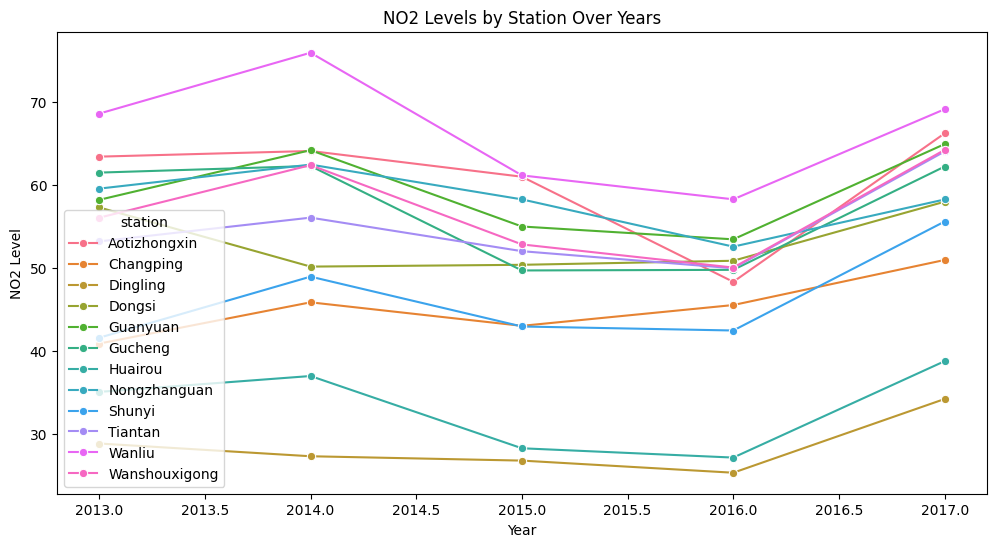

In [129]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='NO2', hue='station', marker='o')
plt.title('NO2 Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('NO2 Level')
plt.show()

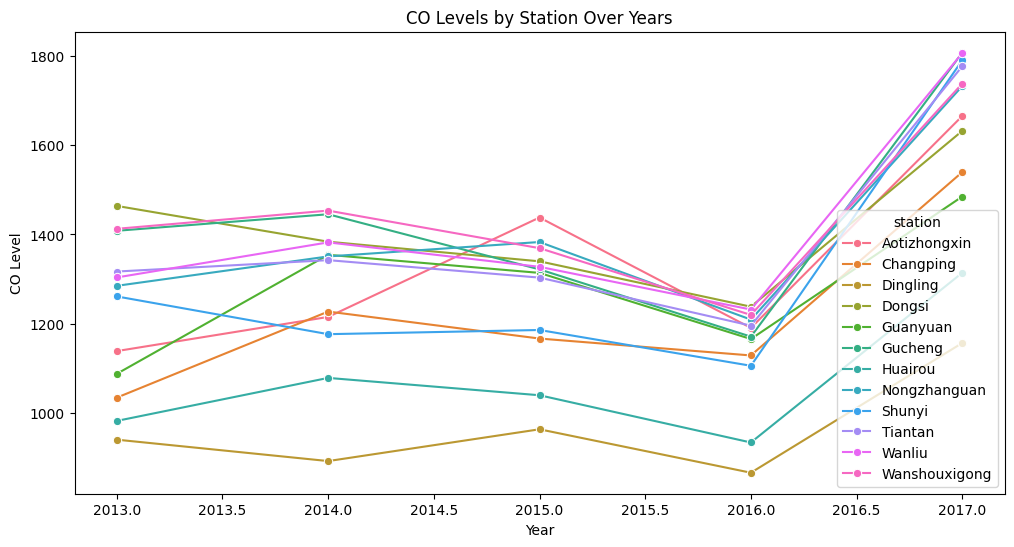

In [130]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='CO', hue='station', marker='o')
plt.title('CO Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('CO Level')
plt.show()

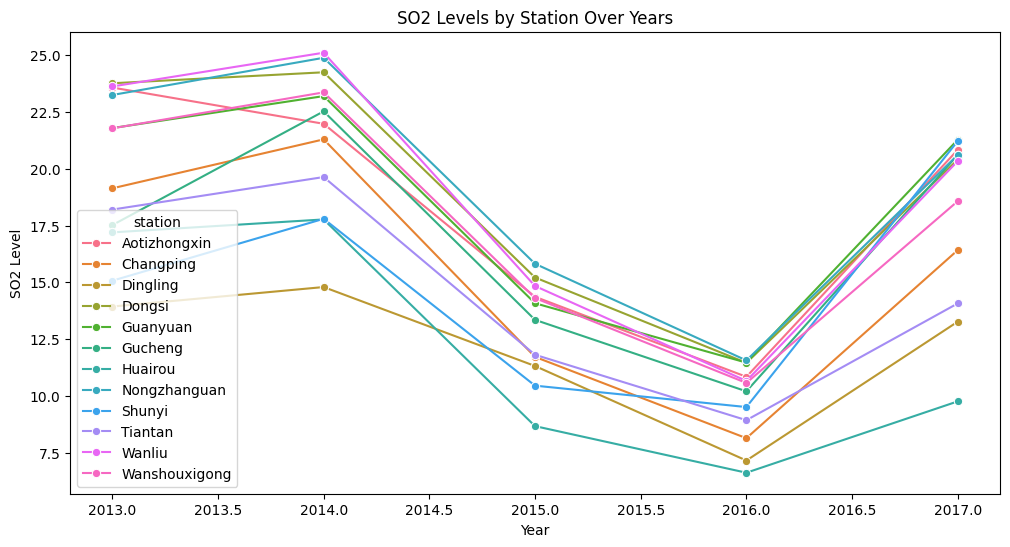

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='SO2', hue='station', marker='o')
plt.title('SO2 Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('SO2 Level')
plt.show()

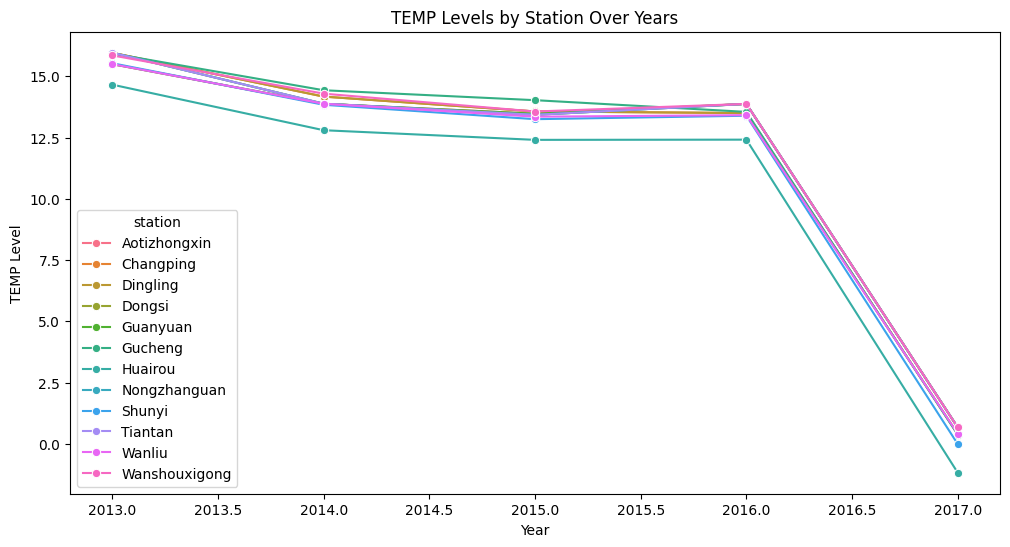

In [132]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='TEMP', hue='station', marker='o')
plt.title('TEMP Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('TEMP Level')
plt.show()

### Classification (Extra) (KMeans-Polluted Categorization)

c:\Users\axell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       PCA Component 1  PCA Component 2
PM2.5         0.471289         0.259077
PM10          0.454400         0.296905
SO2           0.346279         0.057553
NO2           0.445208        -0.243051
CO            0.463404         0.010581
O3           -0.196326         0.884437


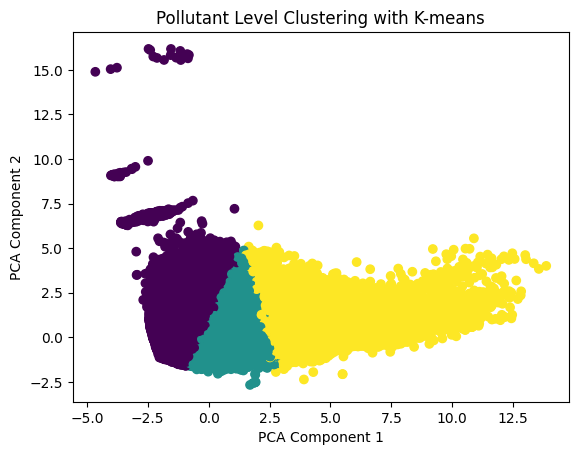

In [133]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = merged_df_int.iloc[:,:6]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)  # Using 3 clusters as an example
labels = kmeans.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
loadings = pca.components_.T
feature_names = data.columns.tolist()
loadings_df = pd.DataFrame(loadings, columns=['PCA Component 1', 'PCA Component 2'], index=feature_names)
print(loadings_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Pollutant Level Clustering with K-means')
plt.show()

#### Artinya
Dari komposisi skor PCA : 
PCA Component-1 didominasi oleh kanudngan SO2,NO2,CO,PM2.5, dan PM10 yang berarti polutan
PCA Component-2 didominasi oleh kandungan Ozon

Dari plot :
Stasiun dengan skor polutan (SO2,NO2,CO) yang tinggi, kebanyakan memiliki kandungan O3 yang rendah.
Stasiun dengan kandungan ozon yang tinggi, biasanya memiliki kandungan NO2 yang lebih rendah.

Secara warna kluster, Ungu berarti daerah dengan Ozon (O3) yang banyak, dengan catatan NO2 yang rendah, dan polutan yang rendah secara umum
Hijau berarti kondisi tengah-tengah (normal) dengan polutan berimbang serta ozon yang tidak terlalu terpengaruh
Kuning berarti kondisi udara buruk dengan polutan yang melebihi batas dengan ozon yang memburuk.

## Visualitation and Explanatory Data Analysis

#### Hubungan Antar Variabel

Pertama-tama, kembali saya akan memvisualkan hubungan antar variabel non-TimeSeries dari data yang diberikan

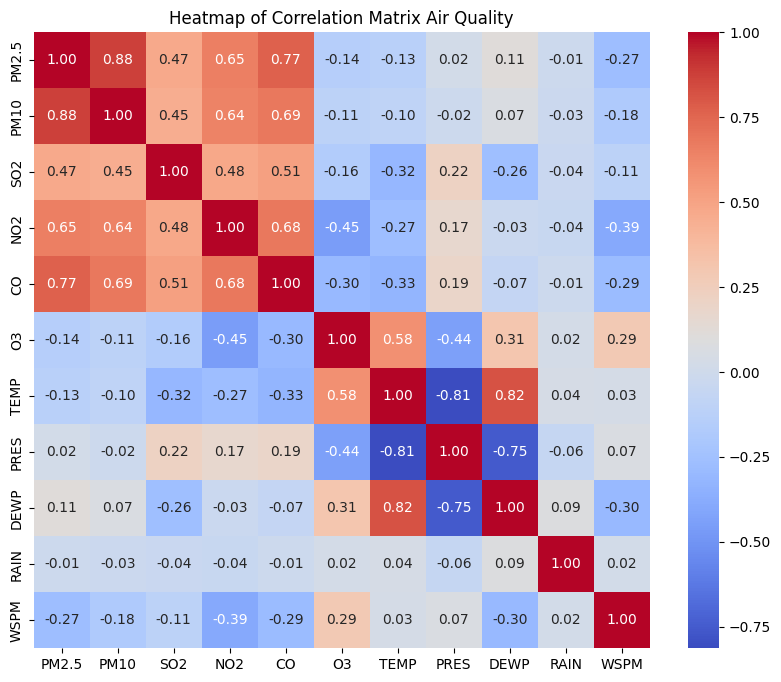

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_coor, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix Air Quality')
plt.show()

Didapati bahwa ada 2 grup yang cukup mencolok yakni :


1.   Group 1 - Kualitas Udara secara Kimia (PM2.5 PM.10 SO2 NO2 CO)
2.   Group 2 - Kualitas Udara secara Fisika (O3, TEMP, PRES, DEWP)

Secara Kimiawi, Partikel NO2,SO2,CO cukup berbahaya dikarenakan ada kemungkinan beberapa partikel lebih kecil dari 2.5 dan 10 mikron.
Menariknya adalah, Ada kaitan kecil antara kenaikan SO2, dan CO, terhadap penurunan Temperatur

Disisi lain, benar bahwa Ozon memegang peranan penting untuk penjagaan temperatur yang mana, Ozon ini akan cenderung berkurang seiring dengan naiknya kadar NO2 (bisa dilihat terdapat correlation score moderat negatif antara O3 dan NO2)



#### Perkembangan Kadar Polutan (SO2,NO2,CO) dari Tahun Ke Tahun

##### SO2

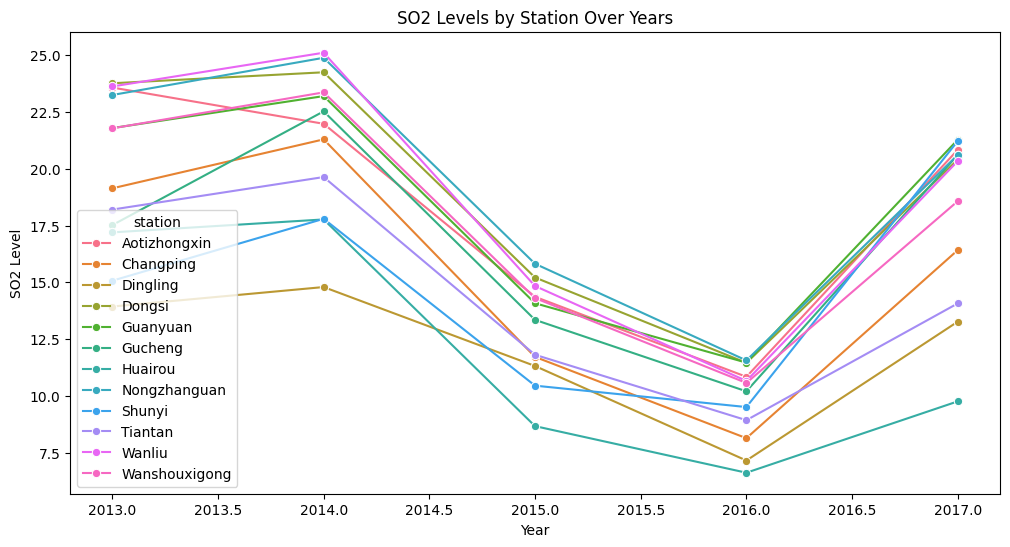

In [135]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='SO2', hue='station', marker='o')
plt.title('SO2 Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('SO2 Level')
plt.show()

##### NO2

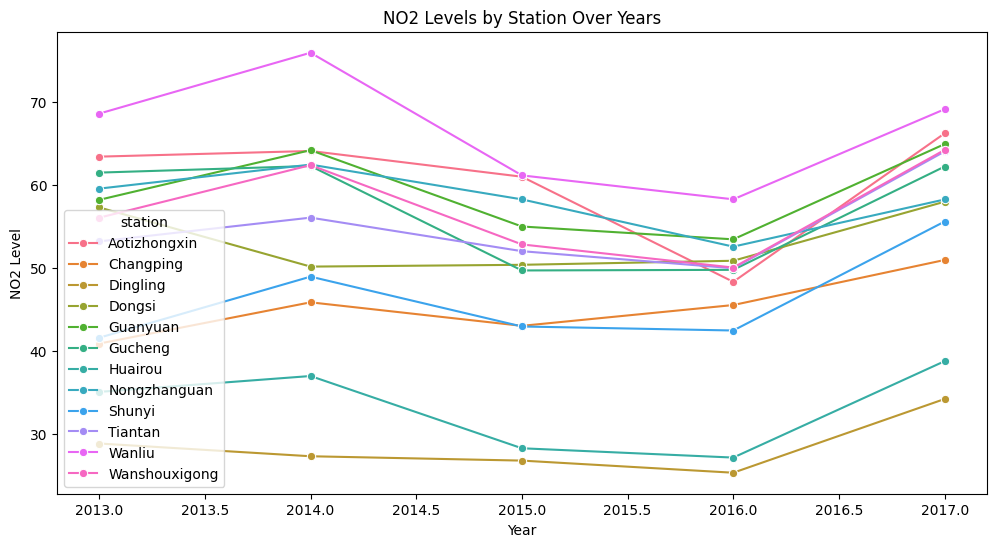

In [136]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='NO2', hue='station', marker='o')
plt.title('NO2 Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('NO2 Level')
plt.show()

##### CO

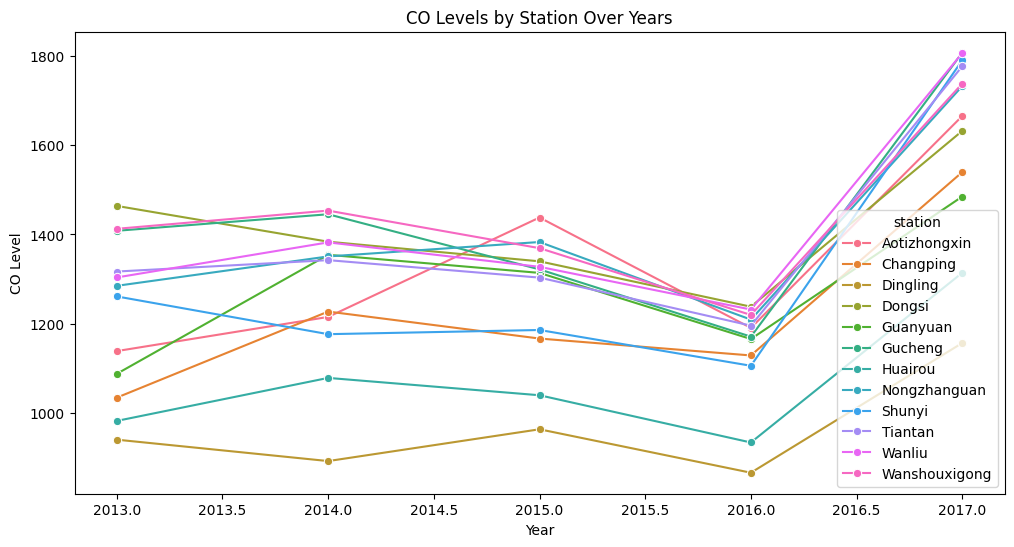

In [137]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year', y='CO', hue='station', marker='o')
plt.title('CO Levels by Station Over Years')
plt.xlabel('Year')
plt.ylabel('CO Level')
plt.show()

Dari 3 Gambar diatas, didapati adanya penurunan yang signifikan untuk SO2 dan CO2 di tahun 2014-2016. Jika kita mengaitkannya dengan berita di Internet, data tahun 2014-2016 juga menunjukkan bahwa China mengalami penurunan pertumbuhan ekonomi. China sendiri adalah sebuah negara industrial, sehingga turunnya pertumbuhan berkaitan erat dengan penurunan produksi yang mana membutuhkan Listrik dg sumber Batubara.

Adapun kenaikan 2017 disebabkan overvalued Dollar AS yang mana menggenjot produksi China sehingga tentu saja kadar polutan juga ikut naik

#### Klustering (Kualitas Udara)

c:\Users\axell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       PCA Component 1  PCA Component 2
PM2.5         0.471289         0.259077
PM10          0.454400         0.296905
SO2           0.346279         0.057553
NO2           0.445208        -0.243051
CO            0.463404         0.010581
O3           -0.196326         0.884437


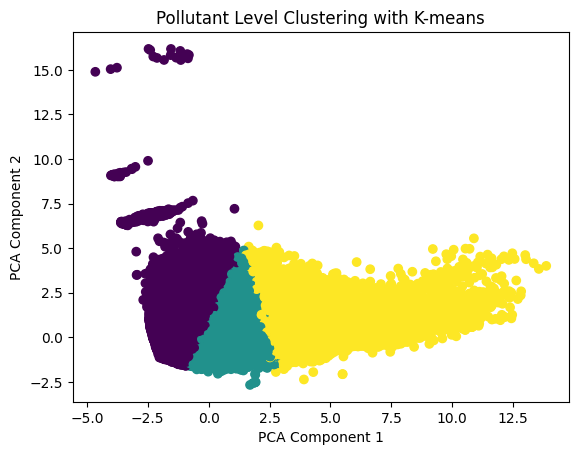

In [138]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = merged_df_int.iloc[:,:6]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)  # Using 3 clusters as an example
labels = kmeans.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
loadings = pca.components_.T
feature_names = data.columns.tolist()
loadings_df = pd.DataFrame(loadings, columns=['PCA Component 1', 'PCA Component 2'], index=feature_names)
print(loadings_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Pollutant Level Clustering with K-means')
plt.show()

In [140]:
print(data)

        PM2.5  PM10   SO2   NO2     CO    O3
0         4.0   4.0   4.0   7.0  300.0  77.0
1         8.0   8.0   4.0   7.0  300.0  77.0
2         7.0   7.0   5.0  10.0  300.0  73.0
3         6.0   6.0  11.0  11.0  300.0  72.0
4         3.0   3.0  12.0  12.0  300.0  72.0
...       ...   ...   ...   ...    ...   ...
420763   11.0  32.0   3.0  24.0  400.0  72.0
420764   13.0  32.0   3.0  41.0  500.0  50.0
420765   14.0  28.0   4.0  38.0  500.0  54.0
420766   12.0  23.0   4.0  30.0  400.0  59.0
420767   13.0  19.0   4.0  38.0  600.0  49.0

[420768 rows x 6 columns]


Secara Komposisi PCA, PCA Component 1 berfokus pada sumber Polutan dan PCA Component 2 berfokus pada Ozon.


Secara garis besar, semakin rendahnya polutan makan kualitas Ozon semakin naik dan berlaku sebaliknya.
Berdasar pada data yang ada, kualitas udara yang dihimpun semakin menunjukkan arah polusi yang tidak sehat serta menurunkan kualitas ozon


## Conclusion

1. Bagaimana perkembangan kualitas udara di beberapa lokasi dari tahun ke tahun?

Perkembangannya sangat fluktuatif dan secara garis besar dapat dikatakan stagnan dikarenakan kualitas udara dari tahun 2013 pada akhirnya tidak jauh berbeda dengan tahun 2017.

Tahun 2016 menjadi tahun dengan kualitas udara terbaik dengan data menunjukkan penurunan kadar SO2 minimal sebanyak 23% dari tahun sebelumnya di berbagai kota.
Prestasi ini ternyata tidak bertahan lama sebelum akhirnya terjadi penurunan kualitas udara secara masif di tahun 2017 karena faktor ekonomi

2. Apakah Polutan memengaruhi Suhu?

Dari Correlation Matrix pada Exploratory Analysis, data menunjukkan kadar SO2,NO2, dan CO yang merupakan polutan, memiliki andil kecil (-0.3 score) dalam pengaruhnya terhadap suhu. Adapun lebih lanjut, semakin naiknya polutan memicu penurunan suhu (negative correlation).
Faktor paling utama tetap dipegang oleh Ozon (O3)

3. Bagaimana pengaruh Polutan terhadap Ozon (O3)?

Polutan khususnya NO2 sangat berpengaruh terhadap Ozon. Adapun dari data tahun ketahun, lapisan ozon lebih mengarah ke negatif yang mana juga akan memicu pertumbuhan temperatur dan lain-lain.